# Problem Statement = Price variance of cars ?

In [4]:


import os # changing your working directory(Only dataset directory)
import pandas as pd
os.chdir(r'C:\Users\kishore-lpt\Downloads\datasets')
infile = pd.read_csv('Carsdata.csv')
infile.head()


,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.10313,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.03608,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.84786,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.91314,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.17032,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1


In [5]:
numdf = infile.loc[:,['Price','Mileage','Cylinder','Liter','Doors','Cruise','Leather','Sound']]
catgdf = infile.loc[:,['Make','Type']]
dummydf = pd.get_dummies(catgdf)
indata = pd.concat([numdf,dummydf],axis=1) # axis = 1 for concat , By default its append(One set below append)
indata.head()

,Price,Mileage,Cylinder,Liter,Doors,Cruise,Leather,Sound,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17314.10313,8221,6,3.1,4,1,1,1,1,0,0,0,0,0,0,0,0,1,0
1,17542.03608,9135,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,1,0
2,16218.84786,13196,6,3.1,4,1,0,1,1,0,0,0,0,0,0,0,0,1,0
3,16336.91314,16342,6,3.1,4,1,0,0,1,0,0,0,0,0,0,0,0,1,0
4,16339.17032,19832,6,3.1,4,1,1,0,1,0,0,0,0,0,0,0,0,1,0


# RFE

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
x= indata.loc[:,['Mileage','Cylinder','Liter','Doors','Cruise','Leather','Sound','Make_Cadillac','Make_Chevrolet','Make_Pontiac','Make_SAAB','Make_Saturn','Type_Convertible','Type_Coupe','Type_Hatchback','Type_Sedan','Type_Wagon']]
y = indata.loc[:,['Price']]
lmmod = LinearRegression()
rfemod = RFE(lmmod,1)
rfemod.fit(x,y)
rankingdf = pd.DataFrame(rfemod.ranking_).T
rankingdf.columns = x.columns
rankingdf

C:\Users\kishore-lpt\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,Mileage,Cylinder,Liter,Doors,Cruise,Leather,Sound,Make_Cadillac,Make_Chevrolet,Make_Pontiac,Make_SAAB,Make_Saturn,Type_Convertible,Type_Coupe,Type_Hatchback,Type_Sedan,Type_Wagon
0,17,13,4,7,16,15,14,1,11,10,3,12,2,6,8,9,5


# Adjusted r2

In [18]:
# adjusted R2 function
def calc_r2_adj(x,y,predy):
    r2 = r2_score(y,predy)
    n = len(y)
    p = x.shape[1]
    adjr2 = 1 - (1-r2) * (n-1)/ (n-p-1)
    return(r2,adjr2)

# Building Model

In [39]:
lmmod = LinearRegression()
x= indata.loc[:,['Make_Cadillac','Type_Convertible','Make_SAAB','Liter','Type_Wagon','Type_Coupe']]
y= indata.loc[:,'Price']
lmmod.fit(x,y)
predPrice = lmmod.predict(x)
predPrice = lmmod.predict(x) #dataframe
print(calc_r2_adj(x,y,predPrice))
print(lmmod.intercept_ , lmmod.coef_) 

(0.9090408381696331, 0.9084709186092924)
3207.0660470929142 [16424.59192794 11951.26117656 12329.57776701  4515.27517402
  3718.78489942]


## Residual plot

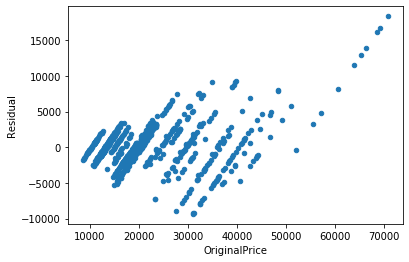

In [36]:
residualdf = pd.DataFrame()
residualdf['OriginalPrice'] = y # orginal target value
residualdf['PredictedPrice'] = predPrice # predicted target value
residualdf['Residual'] = y - predPrice # Diffrence
residualdf = residualdf.sort_values(by='OriginalPrice') # Sorting
%matplotlib inline
residualdf.plot.scatter(x='OriginalPrice',y='Residual')

In [37]:
print(lmmod.intercept_ , lmmod.coef_)

3139.3022138591987 [16523.90220074 11991.36114379 12388.68740175  4506.94265312
  3772.4627592    390.76025996]


In [ ]:
y = a +b1x1 + b2x2 + b3x3...
price = 3139 + 16523*cadill +11991*con +123*saab +4506*liter + 3772*TypeWagon + 390*Type_coupe